In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D 
from sklearn import svm, datasets
from sklearn import metrics
import plotly.graph_objs as go
from sklearn import datasets
from sklearn import datasets
dataset = pd.read_csv('/home/inlab/Documents/testdataforhyperledger.csv')

X = dataset.iloc[:,[0,2]].values

Y = dataset.iloc[:, 4].values


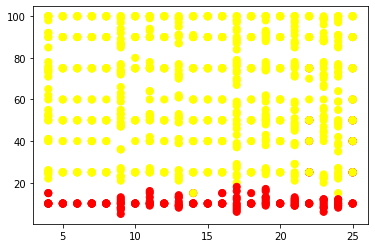

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn');

In [6]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

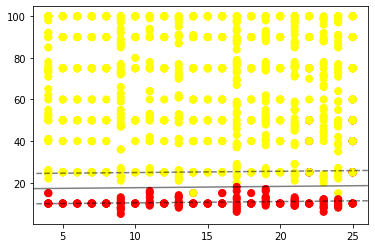

In [7]:
clf = SVC(kernel='linear').fit(X, Y)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
plot_svc_decision_function(clf);

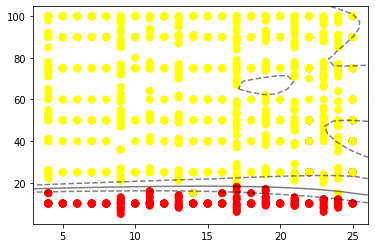

In [10]:
3

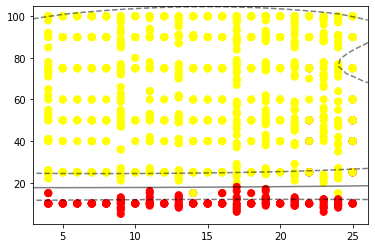

In [12]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))
from mpl_toolkits import mplot3d
clf = SVC(kernel='rbf')
clf.fit(X, Y)

plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

ValueError: X.shape[1] = 2 should be equal to 3, the number of features at training time

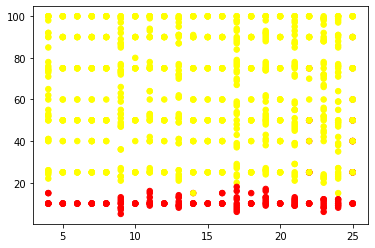

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from skimage import measure
from sklearn.datasets import make_blobs, make_circles

from tikzplotlib import save as tikz_save
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

clf = svm.SVC(kernel='rbf')
clf.fit(X, Y)

plt.scatter(X[:, 0], X[:, 2], c=Y, s=30, cmap='autumn')


# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--','-','--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')


################## KERNEL TRICK - 3D ##################

trans_X = np.array([[item[0]**2, item[1]**2, np.sqrt(2*item[0]*item[1])] for item in X])

fig = plt.figure()
ax = plt.axes(projection ="3d")

# creating scatter plot
ax.scatter3D(trans_X[:,0],trans_X[:,1],trans_X[:,2], c = Y,cmap='autumn')

clf2 = svm.SVC(kernel='rbf')
clf2.fit(trans_X, Y)


z = lambda x,y: (-clf2.intercept_[0]-clf2.coef_[0][0]*x-clf2.coef_[0][1]*y) / clf2.coef_[0][2]

ax = plt.gca(projection='3d')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
zlim = ax.get_zlim()

### from here i don't know what to do ###
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
zz = np.linspace(zlim[0], zlim[1], 50)
XX ,YY, ZZ = np.meshgrid(xx, yy, zz)
xyz = np.vstack([XX.ravel(), YY.ravel(), ZZ.ravel()]).T
Z = clf2.decision_function(xyz).reshape(XX.shape)

# find isosurface with marching cubes
dx = xx[1] - xx[0]
dy = yy[1] - yy[0]
dz = zz[1] - zz[0]
verts, faces, _, _ = measure.marching_cubes_lewiner(Z, 0, spacing=(1, 1, 1), step_size=2)
verts *= np.array([dx, dy, dz])
verts -= np.array([xlim[0], ylim[0], zlim[0]])

# add as Poly3DCollection
mesh = Poly3DCollection(verts[faces])
mesh.set_facecolor('g')
mesh.set_edgecolor('none')
mesh.set_alpha(0.3)
ax.add_collection3d(mesh)
ax.view_init(20, -45)
plt.savefig('kerneltrick')

ValueError: X.shape[1] = 2 should be equal to 3, the number of features at training time

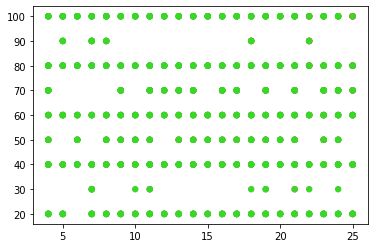

In [29]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from skimage import measure
from sklearn.datasets import make_blobs, make_circles

from tikzplotlib import save as tikz_save
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

clf = svm.SVC(kernel='rbf',C =100000)
clf.fit(X, Y)
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
clf.support_vectors_
plt.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=cm_dark)
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=50,
           linewidth=1, facecolors='none', edgecolors='k')

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--','-','--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')


################## KERNEL TRICK - 3D ##################

trans_X = np.array([[item[0]**2, item[1]**2, np.sqrt(2*item[0]*item[1])] for item in X])

fig = plt.figure()
ax = plt.axes(projection ="3d")

# creating scatter plot
ax.scatter3D(trans_X[:,0],trans_X[:,1],trans_X[:,2], c = Y, cmap=cm_dark)

clf2 = svm.SVC(kernel='rbf',C=100000)
clf2.fit(trans_X, y)


z = lambda x,y: (-clf2.intercept_[0]-clf2.coef_[0][0]*x-clf2.coef_[0][1]*y) / clf2.coef_[0][2]

ax = plt.gca(projection='3d')
#fig = go.FigureWidget()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
zlim = ax.get_zlim()

### from here i don't know what to do ###
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
zz = np.linspace(zlim[0], zlim[1], 50)
XX ,YY, ZZ = np.meshgrid(xx, yy, zz)
xyz = np.vstack([XX.ravel(), YY.ravel(), ZZ.ravel()]).T
Z = clf2.decision_function(xyz).reshape(XX.shape)

# find isosurface with marching cubes
dx = xx[1] - xx[0]
dy = yy[1] - yy[0]
dz = zz[1] - zz[0]
verts, faces, _, _ = measure.marching_cubes_lewiner(Z, 0, spacing=(1, 1, 1), step_size=2)
verts *= np.array([dx, dy, dz])
verts -= np.array([xlim[0], ylim[0], zlim[0]])

# add as Poly3DCollection
mesh = Poly3DCollection(verts[faces])
mesh.set_facecolor('g')
mesh.set_edgecolor('none')
mesh.set_alpha(0.3)
ax.add_collection3d(mesh)
ax.view_init(20, -45)
plt.savefig('kerneltrick')




<ipython-input-1-e66f5339b8f7>:36: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection='3d')
<ipython-input-1-e66f5339b8f7>:52: FutureWarning: marching_cubes_lewiner is deprecated in favor of marching_cubes. marching_cubes_lewiner will be removed in version 0.19
  verts, faces, _, _ = measure.marching_cubes_lewiner(Z, 0, spacing=(1, 1, 1), step_size=2)


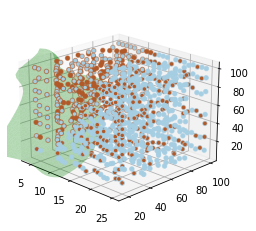

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D 
from sklearn import svm, datasets
from sklearn import metrics
import plotly.graph_objs as go
from sklearn import datasets
from skimage import measure
from sklearn.datasets import make_blobs, make_circles

from tikzplotlib import save as tikz_save
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
dataset = pd.read_csv('/home/inlab/Documents/testdataforhyperledgerhigh.csv')
#dataset = pd.read_csv('/home/inlab/Documents/testdataforhyperledger.csv')

X = dataset.iloc[:,[0,1,2]].values

Y = dataset.iloc[:, 4].values
fig = plt.figure()
ax = plt.axes(projection ="3d")
# fit the model
clf = svm.SVC(kernel='rbf',C=100000)
clf.fit(X, Y)

ax.scatter3D(X[:,0],X[:,1],X[:,2], c = Y, cmap=plt.cm.Paired)
#ax.scatter3D(X[:,0],X[:,1],X[:,2], c = Y, cmap=plt.cm.Paired)

z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x-clf.coef_[0][1]*y) / clf.coef_[0][2]
# plot the decision function for each datapoint on the grid
#Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
# = Z.reshape(xx.shape)
ax = plt.gca(projection='3d')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
zlim = ax.get_zlim()

xx = np.linspace(xlim[0], xlim[1])
yy = np.linspace(ylim[0], ylim[1])
zz = np.linspace(zlim[0], zlim[1])
XX ,YY, ZZ = np.meshgrid(xx, yy, zz)
xyz = np.vstack([XX.ravel(), YY.ravel(), ZZ.ravel()]).T
Z = clf.decision_function(xyz).reshape(XX.shape)

# find isosurface with marching cubes
dx = xx[1] - xx[0]
dy = yy[1] - yy[0]
dz = zz[1] - zz[0]
verts, faces, _, _ = measure.marching_cubes_lewiner(Z, 0, spacing=(1, 1, 1), step_size=2)
verts *= np.array([dx, dy, dz])
verts -= np.array([xlim[0], ylim[0], zlim[0]])

# add as Poly3DCollection
mesh = Poly3DCollection(verts[faces])
mesh.set_facecolor('g')
mesh.set_edgecolor('none')
ax.view_init(20, -45)
mesh.set_alpha(0.3)
ax.add_collection3d(mesh)



In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D 
from sklearn import svm, datasets
from sklearn import metrics
import plotly.graph_objs as go
from sklearn import datasets
from skimage import measure
from sklearn.datasets import make_blobs, make_circles

from tikzplotlib import save as tikz_save
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
dataset = pd.read_csv('/home/inlab/Documents/testdataforhyperledger.csv')


X = dataset.iloc[:,[0,1,2]].values

Y = dataset.iloc[:, 4].values

clf = svm.SVC(kernel='rbf',C=100000)
clf.fit(X, Y)

z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x-clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(10,130,51)
tmp1 = np.linspace(0,30,100)
#tmp = np.linspace(-2,2,51)
x,y = np.meshgrid(tmp1,tmp)

#fig = plt.figure() 
fig = go.FigureWidget()

fig.add_surface(x=x, y=y, z=z(x,y),colorscale='darkmint',opacity = 0.7, showscale=False)
fig.add_scatter3d(x=X_test[y_test==0,0], y=X_test[y_test==0,1], z=X_test[y_test==0,2], mode='markers',marker_symbol='circle', marker={'color': 'red','size':5,'opacity':0.5}, name = "Non-trustable")
fig.add_scatter3d(x=X_test[y_test==1,0], y=X_test[y_test==1,1], z=X_test[y_test==1,2], mode='markers', marker_symbol='cross',marker={'color': 'blue','size':5}, name = "Trustable")
fig.update_layout(title='Plotting 3D Decision Boundary From Linear SVM',scene_aspectmode='cube',
scene ={'xaxis':{'title': 'Total Peers'},
'yaxis':{'title': 'Endorsing Peers(%)'},
'zaxis':{'title': 'Bandwidth Limit(Mbps)'}})
fig.show()

AttributeError: coef_ is only available when using a linear kernel

Automatically created module for IPython interactive environment


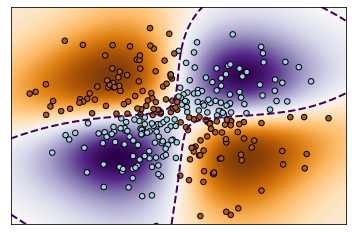

In [12]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = svm.NuSVC(gamma='auto')
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linestyles='dashed')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

In [144]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.svm import SVC # for Support Vector Classification model

import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D 
from sklearn import svm, datasets
from sklearn import metrics
import plotly.graph_objs as go
from sklearn import datasets
from sklearn import datasets
dataset = pd.read_csv('/home/inlab/Documents/testdataforhyperledger.csv')

X = dataset.iloc[:,[0,1,2]].values

y = dataset.iloc[:, 4].values


In [145]:

# Create training and testing samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

 # Fit the model
    # Note, available kernels: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
model = SVC(kernel='rbf', probability=True, C=1)
clf = model.fit(X_train, y_train)

    # Predict class labels on training data
pred_labels_tr = model.predict(X_train)
    # Predict class labels on a test data
pred_labels_te = model.predict(X_test)

    # Use score method to get accuracy of the model
print('----- Evaluation on Test Data -----')
score_te = model.score(X_test, y_test)
print('Accuracy Score: ', score_te)
    # Look at classification report to evaluate the model
print(classification_report(y_test, pred_labels_te))
print('--------------------------------------------------------')

print('----- Evaluation on Training Data -----')
score_tr = model.score(X_train, y_train)
print('Accuracy Score: ', score_tr)
    # Look at classification report to evaluate the model
print(classification_report(y_train, pred_labels_tr))
print('--------------------------------------------------------')
    


----- Evaluation on Test Data -----
Accuracy Score:  0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        17
           1       0.92      1.00      0.96        58

    accuracy                           0.93        75
   macro avg       0.96      0.85      0.89        75
weighted avg       0.94      0.93      0.93        75

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.959866220735786
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        55
           1       0.95      1.00      0.98       244

    accuracy                           0.96       299
   macro avg       0.98      0.89      0.93       299
weighted avg       0.96      0.96      0.96       299

--------------------------------------------------------


In [146]:

# Create training and testing samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

 # Fit the model
    # Note, available kernels: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
model = SVC(kernel='rbf', probability=True, C=1000)
clf = model.fit(X_train, y_train)

    # Predict class labels on training data
pred_labels_tr = model.predict(X_train)
    # Predict class labels on a test data
pred_labels_te = model.predict(X_test)

    # Use score method to get accuracy of the model
print('----- Evaluation on Test Data -----')
score_te = model.score(X_test, y_test)
print('Accuracy Score: ', score_te)
    # Look at classification report to evaluate the model
print(classification_report(y_test, pred_labels_te))
print('--------------------------------------------------------')

print('----- Evaluation on Training Data -----')
score_tr = model.score(X_train, y_train)
print('Accuracy Score: ', score_tr)
    # Look at classification report to evaluate the model
print(classification_report(y_train, pred_labels_tr))
print('--------------------------------------------------------')
    


----- Evaluation on Test Data -----
Accuracy Score:  0.9733333333333334
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.97      1.00      0.98        58

    accuracy                           0.97        75
   macro avg       0.98      0.94      0.96        75
weighted avg       0.97      0.97      0.97        75

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.9966555183946488
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        55
           1       1.00      1.00      1.00       244

    accuracy                           1.00       299
   macro avg       0.99      1.00      0.99       299
weighted avg       1.00      1.00      1.00       299

--------------------------------------------------------


explained variance ratio (first two components): [0.58489354 0.39161685 0.02348961]


IndexError: index 1 is out of bounds for axis 1 with size 1

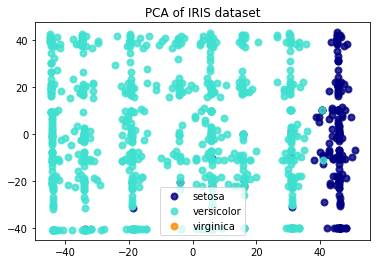

<Figure size 432x288 with 0 Axes>

In [34]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D 
from sklearn import svm, datasets
from sklearn import metrics
import plotly.graph_objs as go
from sklearn import datasets

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn import datasets
dataset = pd.read_csv('/home/inlab/Documents/testdataforhyperledger.csv')
X = dataset.iloc[:,[0,1,2]].values

y = dataset.iloc[:, 4].values


pca = PCA(n_components=3)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=1)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

explained variance ratio (first two components): [0.58489354 0.39161685 0.02348961]


IndexError: index 1 is out of bounds for axis 1 with size 1

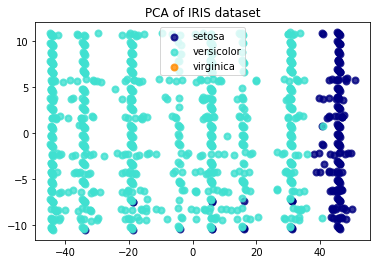

<Figure size 432x288 with 0 Axes>

In [35]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D 
from sklearn import svm, datasets
from sklearn import metrics
import plotly.graph_objs as go
from sklearn import datasets

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn import datasets
dataset = pd.read_csv('/home/inlab/Documents/testdataforhyperledger.csv')
X = dataset.iloc[:,[0,1,2]].values

y = dataset.iloc[:, 4].values


pca = PCA(n_components=3)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=1)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 2], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()